In [9]:
from pathlib import Path
import os

from neural_network.network import Network
from neural_network.layers import Dense
from neural_network.cost import Cost

In [16]:
 root = Path(os.path.abspath('')).resolve().parent

In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

file_path = str(root) + '/data/housing.csv'
data = pd.read_csv(file_path)

data = data.dropna()
data = data.drop(columns=['longitude', 'latitude', 'ocean_proximity'])

X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values

scaler_X = StandardScaler()
X = scaler_X.fit_transform(X)

scaler_Y = StandardScaler()
Y = scaler_Y.fit_transform(Y.reshape(-1, 1)).flatten()

In [19]:
network = Network(
    layers=[
        Dense(X.shape[1], 10, "relu"), 
        Dense(10, 10, "relu"), 
        Dense(10, 1, "none")
    ], 
    cost=Cost("MSE")
)

In [20]:
epochs = 1000
training_progress = network.train(X, Y, epochs, learning_rate=0.005, validation_split=0.2, verbose=True, verbose_percentage=10)

[--------------------] Progress: 0.0% - Epoch 0/1000 - Loss: 65.2095 - Validation Loss: 308.7667


[==------------------] Progress: 10.0% - Epoch 100/1000 - Loss: 0.5640 - Validation Loss: 0.5569


[====----------------] Progress: 20.0% - Epoch 200/1000 - Loss: 0.4810 - Validation Loss: 0.4742


[======--------------] Progress: 30.0% - Epoch 300/1000 - Loss: 0.4610 - Validation Loss: 0.4553


[========------------] Progress: 40.0% - Epoch 400/1000 - Loss: 0.4504 - Validation Loss: 0.4456


[==========----------] Progress: 50.0% - Epoch 500/1000 - Loss: 0.4423 - Validation Loss: 0.4389


[============--------] Progress: 60.0% - Epoch 600/1000 - Loss: 0.4357 - Validation Loss: 0.4337


[==============------] Progress: 70.0% - Epoch 700/1000 - Loss: 0.4302 - Validation Loss: 0.4287


[================----] Progress: 80.0% - Epoch 800/1000 - Loss: 0.4262 - Validation Loss: 0.4244


[==================--] Progress: 90.0% - Epoch 900/1000 - Loss: 0.4231 - Validation Loss: 0.4200


[=========

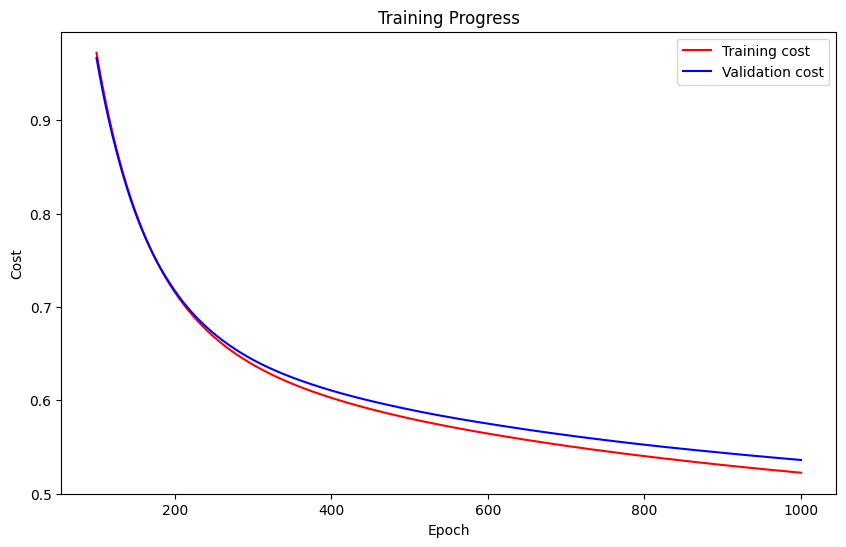

In [5]:
import matplotlib.pyplot as plt

ignore_first_n = int(epochs / 10)

costs = training_progress['cost'][ignore_first_n:]
val_costs = training_progress['val_cost'][ignore_first_n:]

plt.figure(figsize=(10, 6))
plt.plot(range(ignore_first_n, len(costs) + ignore_first_n), costs, 'r-', label='Training cost')
plt.plot(range(ignore_first_n, len(val_costs) + ignore_first_n), val_costs, 'b-', label='Validation cost')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title('Training Progress')
plt.legend()
plt.show()